<a href="https://colab.research.google.com/github/SHREE-KRIPAAA/Emotion-detection-from-text/blob/main/Cyfuture_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install neattext pandas numpy seaborn scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 1.4 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample


In [ ]:
# Load the dataset
file_path = "/content/tweet_emotions.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display dataset info
print(df.info())
print(df.head())

# Check unique emotions
print("Unique Emotions:", df['sentiment'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
None
     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...
Unique Emotions: ['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


<ipython-input-4-500d44da36cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['sentiment'], order=df['sentiment'].value_counts().index, palette="coolwarm")


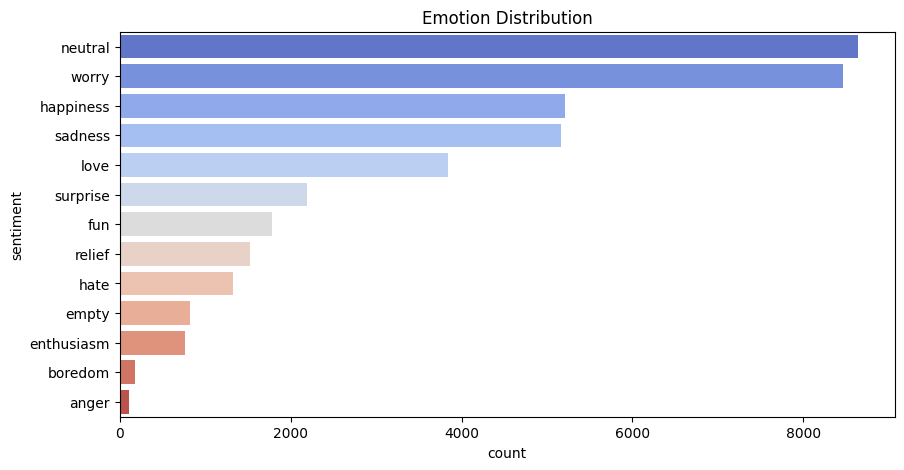

In [ ]:
# Plot emotion distribution
plt.figure(figsize=(10,5))
sns.countplot(y=df['sentiment'], order=df['sentiment'].value_counts().index, palette="coolwarm")
plt.title("Emotion Distribution")
plt.show()


In [ ]:
# Handle class imbalance by upsampling minority classes
max_samples = df['sentiment'].value_counts().max()
df_balanced = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(max_samples, replace=True))


<ipython-input-5-2c4b222f28a4>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(max_samples, replace=True))


In [ ]:
# Apply text cleaning functions
df_balanced['clean_text'] = df_balanced['content'].apply(nfx.remove_userhandles) # Remove @usernames
df_balanced['clean_text'] = df_balanced['clean_text'].apply(nfx.remove_stopwords) # Remove stopwords
df_balanced['clean_text'] = df_balanced['clean_text'].apply(nfx.remove_special_characters) # Remove special chars

# Display cleaned text
print(df_balanced[['content', 'clean_text']].head())


                                                 content  \
20734  @eminem http://twitpic.com/4j585 - Guess I nee...   
13439  @FafsaHelp i don't know what lender it was? ye...   
35913         @NerdIndian Take that back. I am insulted.   
13740                               My throat is on fire   
6971   @wmdev Every time I succeed with a code, I get...   

                                              clean_text  
20734  httptwitpiccom4j585  Guess need iPhone sure lo...  
13439  know lender was yea people definitely sucked b...  
35913                                      back insulted  
13740                                        throat fire  
6971   time succeed code quotWere Sorry Credit Card D...  


In [ ]:
# Convert text to numerical format with improved vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df_balanced['clean_text'])

# Labels
y = df_balanced['sentiment']


In [ ]:
# Split Data (Stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Train SVM Model (performs better than Naïve Bayes)
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Make Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6120931475132464
Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00      1727
     boredom       0.99      1.00      0.99      1728
       empty       0.62      0.78      0.70      1728
  enthusiasm       0.66      0.81      0.72      1728
         fun       0.53      0.62      0.57      1728
   happiness       0.42      0.39      0.41      1727
        hate       0.71      0.77      0.74      1728
        love       0.57      0.54      0.55      1728
     neutral       0.31      0.30      0.30      1727
      relief       0.59      0.63      0.61      1727
     sadness       0.46      0.41      0.43      1728
    surprise       0.53      0.45      0.49      1727
       worry       0.43      0.26      0.33      1728

    accuracy                           0.61     22459
   macro avg       0.60      0.61      0.60     22459
weighted avg       0.60      0.61      0.60     22459



In [ ]:
def predict_emotion(text):
    """Function to predict emotion of a given text input."""
    clean_text = nfx.remove_userhandles(text)
    clean_text = nfx.remove_stopwords(clean_text)
    clean_text = nfx.remove_special_characters(clean_text)

    text_vectorized = vectorizer.transform([clean_text])
    prediction = model.predict(text_vectorized)[0]

    return prediction

# User input for emotion prediction
while True:
    user_text = input("\nEnter a sentence (or type 'exit' to quit): ")

    if user_text.lower() == 'exit':
        print("Exiting emotion detection. Goodbye!")
        break

    emotion = predict_emotion(user_text)
    print(f"🔍 Predicted Emotion: {emotion}")



Enter a sentence (or type 'exit' to quit): wants to hang out with friends SOON!
🔍 Predicted Emotion: enthusiasm

Enter a sentence (or type 'exit' to quit): Wishing I could kidnap him from work
🔍 Predicted Emotion: sadness

Enter a sentence (or type 'exit' to quit): wants to meet Tom
🔍 Predicted Emotion: enthusiasm

Enter a sentence (or type 'exit' to quit): Hey! So glad it's Friday but not happy that I just ate a bad apple
🔍 Predicted Emotion: happiness

Enter a sentence (or type 'exit' to quit): 	Layin n bed with a headache ughhhh...waitin on your call...
🔍 Predicted Emotion: sadness

Enter a sentence (or type 'exit' to quit):  
🔍 Predicted Emotion: neutral

Enter a sentence (or type 'exit' to quit): exit
Exiting emotion detection. Goodbye!


In [ ]:
!pip install streamlit pandas neattext scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
